In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Dropping a few outliers

In [5]:
train = train[train['GrLivArea'] < 4000]

In [6]:
train.shape

(1456, 81)

### Creating subset of the data as per assignment:

In [7]:
cols = ['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'YearBuilt',\
        'RoofStyle', 'Exterior1st', 'ExterCond', 'CentralAir',  'HalfBath']

In [8]:
train[cols].head()

,MSZoning,LotFrontage,LotArea,Alley,OverallQual,YearBuilt,RoofStyle,Exterior1st,ExterCond,CentralAir,HalfBath
0,RL,65.0,8450,NaN,7,2003,Gable,VinylSd,TA,Y,1
1,RL,80.0,9600,NaN,6,1976,Gable,MetalSd,TA,Y,0
2,RL,68.0,11250,NaN,7,2001,Gable,VinylSd,TA,Y,1
3,RL,60.0,9550,NaN,7,1915,Gable,Wd Sdng,TA,Y,0
4,RL,84.0,14260,NaN,8,2000,Gable,VinylSd,TA,Y,1


In [9]:
train[cols].shape

(1456, 11)

## Categorizing the attribute types:
- MSZoning: Categorical
- LotFrontage: Numerical Continuous
- LotArea: Numerical Continuous
- Alley: Categorical
- OverallQual: Ordinal
- YearBuilt: Numerical Discrete
- RoofStyle: Categorical
- Exterioirlst: Categorical
- ExterCond: Categorical
- CentralAir: Categorical
- HalfBath: Discrete

### Computing the % of missing values:

In [10]:
for col in cols:
    print('{}: {}%'.format(col, train[col].isnull().sum()*100/train[col].shape[0]))

MSZoning: 0.0%
LotFrontage: 17.78846153846154%
LotArea: 0.0%
Alley: 93.75%
OverallQual: 0.0%
YearBuilt: 0.0%
RoofStyle: 0.0%
Exterior1st: 0.0%
ExterCond: 0.0%
CentralAir: 0.0%
HalfBath: 0.0%


### Note:
** The missing value % for __Alley__ is misleading, the NA there refers to No Alley Access **

# Plotting the individual variables:

## MSZoning: Identifies the general zoning classification of the sale.
		
- A  : Agriculture
- C  : Commercial
- FV : Floating Village Residential
- I	 : Industrial
- RH : Residential High Density
- RL : Residential Low Density
- RP : Residential Low Density Park 
- RM : Residential Medium Density

In [11]:
mszoning = train[train['MSZoning'].isnull() == False]['MSZoning']

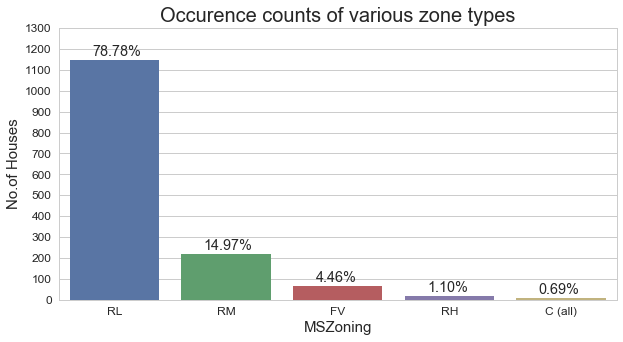

In [12]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.countplot(x=mszoning, orient="v", order=['RL', 'RM', 'FV', 'RH', 'C (all)'])
    ax.set_title('Occurence counts of various zone types', size=20)
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('MSZoning', size=15)
    ps = ((mszoning.value_counts() / mszoning.shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.20, p.get_height()+20))
    ax.set_yticks(np.arange(0, 1400, 100))
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('MSZoning.png', format='png', dpi=480)

### Remarks:
- 77.7% of all the properties that have been considered for selling are residential areas with low population density.
- 15.78% of all the properties that have been considered for selling are residential areas with medium population density.
- We can infer from the above data that there is a high demand of residential area which have medium to low densities

## LotFrontage: Linear feet of street connected to property

In [13]:
lotfrontage = train[train['LotFrontage'].isnull() == False]['LotFrontage']

In [14]:
lotfrontage.describe()

count    1197.000000
mean       69.693400
std        23.054474
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

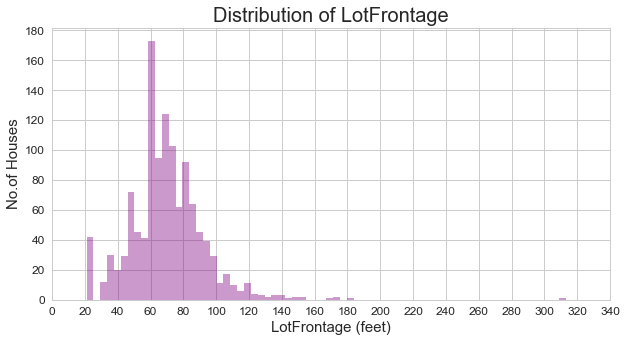

In [15]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.distplot(a=lotfrontage, kde=False, color='purple', bins=70)
    ax.set_title('Distribution of LotFrontage', size=20)
    ax.set_yticks(np.arange(0, 200, 20))
    ax.set_xticks(np.arange(0, 350, 20))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('LotFrontage (feet)', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('LotFrontage.png', format='png', dpi=480)

In [16]:
np.sort(lotfrontage.values)[-20:]

array([ 129.,  129.,  130.,  130.,  134.,  134.,  137.,  138.,  140.,
        141.,  144.,  149.,  150.,  152.,  153.,  168.,  174.,  174.,
        182.,  313.])

### Remarks:
- Most of the properties have street of lenght 60 to 80 feet connected to it.
- It is highly likely there is a outlier which has a 313 feet of street connected to the property. 

## LotArea: Lot size in square feet

In [17]:
lotarea = train[train['LotArea'].isnull() == False]['LotArea']

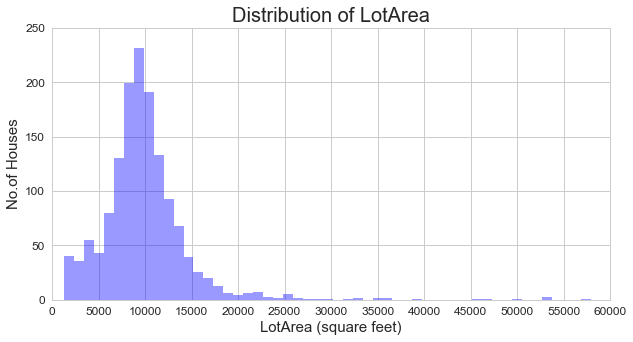

In [18]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.distplot(a=lotarea, kde=False, color='blue', bins=200)
    ax.set_title('Distribution of LotArea', size=20)
    ax.set_xticks(np.arange(0, 250000, 5000))
    ax.set_xlim(0, 60000)
    ax.set_yticks(np.arange(0, 500, 50))
    ax.set_ylim(0, 250)
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('LotArea (square feet)', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('LotArea.png', format='png', dpi=480)

### Remarks:
- Most of the properties sold have a lot area of 5000 to 1000 square feet.
- We could conclude that large properties are sold rarely.

## Alley: Type of alley access to property
- Grvl:	Gravel
- Pave: Paved
- NA: 	No alley access

In [19]:
alley = train['Alley']
alley = alley.fillna('No Alley Access')
alley = alley.replace('Grvl', 'Gravel')
alley = alley.replace('Pave', 'Paved')

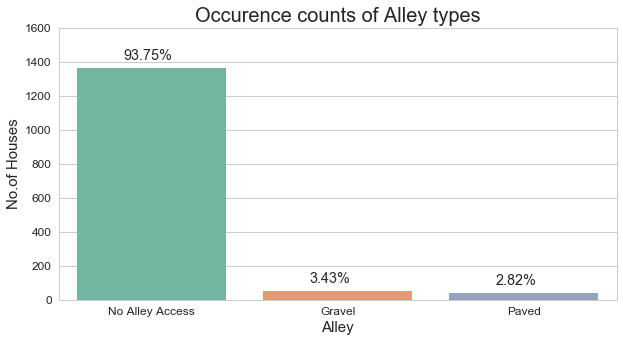

In [20]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.countplot(x=alley, order=['No Alley Access', 'Gravel', 'Paved'], palette='Set2')
    ax.set_title('Occurence counts of Alley types', size=20)
    ax.set_yticks(np.arange(0, 1700, 200))
    ax.set_ylim(0, 1600)
    ps = ((alley.value_counts() / alley.shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.25, p.get_height() + 50))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('Alley', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('Alley.png', format='png', dpi=480)

### Remarks:
- Most of the properties that have been sold do not have an alley access.
- This could mean having an alley access could either be undesirable in general.

## OverallQual: Rates the overall material and finish of the house
- 10:	Very Excellent
- 9:	Excellent
- 8:	Very Good
- 7:	Good
- 6:	Above Average
- 5:	Average
- 4:	Below Average
- 3:	Fair
- 2:	Poor
- 1:	Very Poor


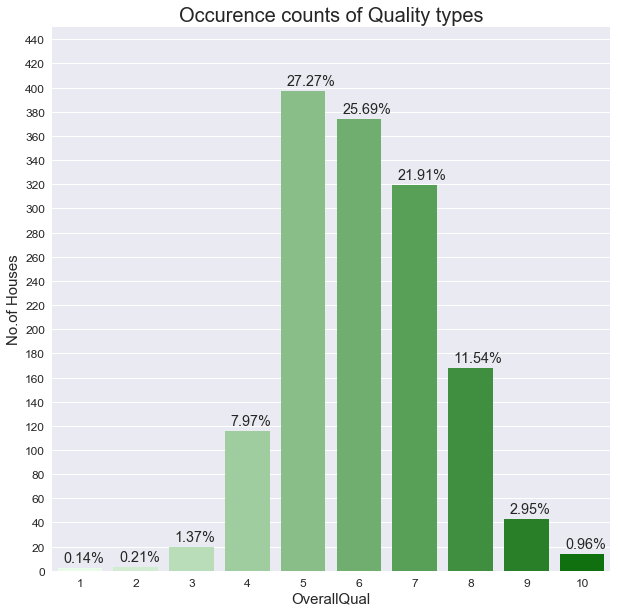

In [21]:
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    fig = plt.figure()
    ax = sns.countplot(x="OverallQual", data=train, palette=sns.light_palette("green", 10))
    ax.set_title('Occurence counts of Quality types', size=20)
    ax.set_yticks(np.arange(0, 500, 20))
    ax.set_ylim(0, 450)
    ps = ((train['OverallQual'].value_counts()[list(range(1, 11))] / train['OverallQual'].shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.1, p.get_height() + 5))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('OverallQual', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 10)
    fig.savefig('OverallQual.png', format='png', dpi=480)

### Remarks:
- The graph shows an expected behaviour; while a poor quality properly rarely gets sold, an average quality one would be sold the most. Properties with excellent quality would come with a high price tag and would also be sold lot less compared to an average property.


## YearBuilt: Original construction date


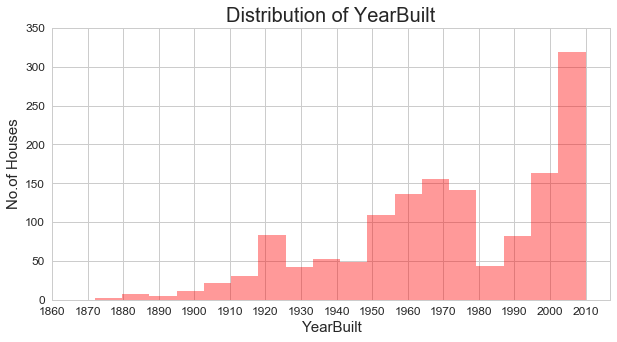

In [22]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.distplot(a=train["YearBuilt"], kde=False, color='red')
    ax.set_title('Distribution of YearBuilt', size=20)
    ax.set_yticks(np.arange(0, 400, 50))
    ax.set_xticks(np.arange(1860, 2017, 10))
    ax.set_ylim(0, 350)
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('YearBuilt', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('YearBuilt.png', format='png', dpi=480)

### Remarks:
- Houses that have been built in recent times are more likely to be sold.
- The trend does not apply to the houses built around 1980 till 1995.
- There seems to be a spike of number of sales for houses built during 1917 till 1925, which was just after the WW1.
- The second spikes appears in case of houses built after 1949 which is just after WW2 ended.
- The trend breaks after that in 1979 which was the beginning of the second oil crisis.

## RoofStyle: Type of roof
- Flat
- Gable	
- Hip	
- Mansard	
- Shed	


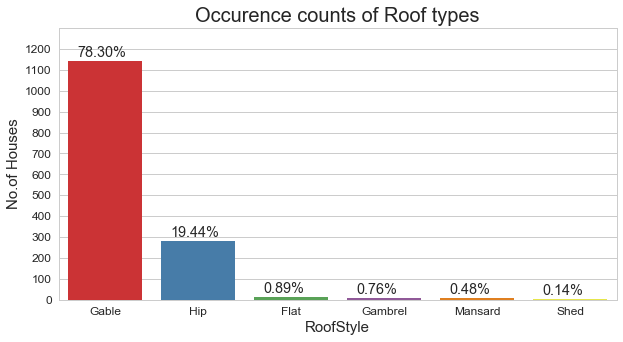

In [23]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    order=['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed']
    ax = sns.countplot(x="RoofStyle", data=train, order=order, palette='Set1')
    ax.set_title('Occurence counts of Roof types', size=20)
    ax.set_yticks(np.arange(0, 1300, 100))
    ax.set_ylim(0, 1300)
    ps = ((train['RoofStyle'].value_counts() / train['RoofStyle'].shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.1, p.get_height() + 20))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('RoofStyle', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('RoofStyle.png', format='png', dpi=480)

### Remarks:
- Most of the houses sold have Gable roofs, or Gable is are the most common type of roof, followed by Hip roofs (by a large margin)

## Exterior1st: Exterior covering on house
- AsbShng:	Asbestos Shingles
- AsphShn:	Asphalt Shingles
- BrkComm:	Brick Common
- BrkFace:	Brick Face
- CBlock:	Cinder Block
- CemntBd:	Cement Board
- HdBoard:	Hard Board
- ImStucc:	Imitation Stucco
- MetalSd:	Metal Siding
- Other:	Other
- Plywood:	Plywood
- PreCast:	PreCast	
- Stone:	Stone
- Stucco:	Stucco
- VinylSd:	Vinyl Siding
- Wd Sdng:	Wood Siding
- WdShing:	Wood Shingles

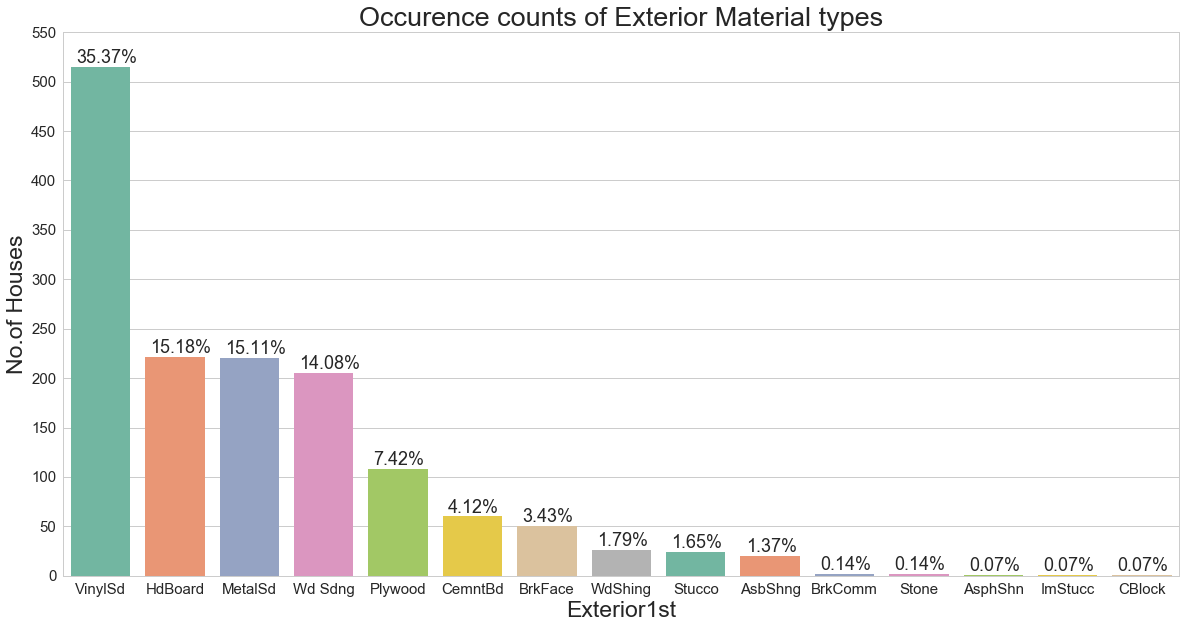

In [24]:
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ps = ((train['Exterior1st'].value_counts() / train['Exterior1st'].shape[0]) * 100)
    vals = np.sort(ps.values)[::-1]
    order = ps.index.values[np.argsort(ps.values)[::-1]].tolist()
    ax = sns.countplot(x="Exterior1st", order=order, data=train, palette='Set2')
    ax.set_title('Occurence counts of Exterior Material types', size=27)
    ax.set_yticks(np.arange(0, 600, 50))
    ax.set_ylim(0, 550)
    ax.set_xlabel(xlabel="Exterior1st", size=23)
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.07, p.get_height() + 4))
    ax.set_ylabel('No.of Houses', size=23)
    fig.add_subplot(ax)
    fig.set_size_inches(20, 10)
    fig.savefig('Exterior1st.png', format='png', dpi=240)

### Remarks:
- While Vinyl Siding remains the popular choice for external covering of the house, hard boards, metal siding and wooden sidings are the next best choices.

## ExterCond: Evaluates the present condition of the material on the exterior
- Ex: Excellent
- Gd: Good
- TA: Average/Typical
- Fa: Fair
- Po: Poor

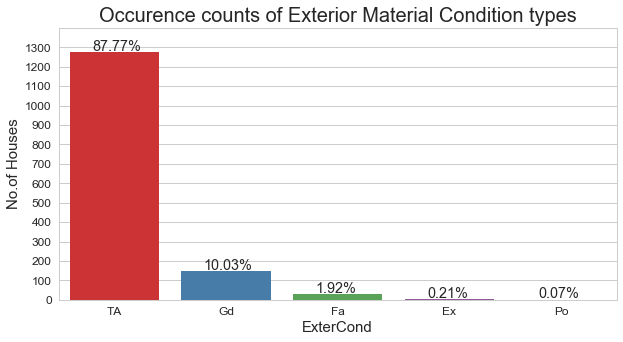

In [25]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ps = (train['ExterCond'].value_counts(normalize=True) * 100)
    vals = np.sort(ps.values)[::-1]
    order = ps.index.values[np.argsort(ps.values)[::-1]].tolist()
    ax = sns.countplot(x="ExterCond", order=order, data=train, palette='Set1')
    ax.set_title('Occurence counts of Exterior Material Condition types', size=20)
    ax.set_yticks(np.arange(0, 1400, 100))
    ax.set_ylim(0, 1400)
    ax.set_xlabel(xlabel="ExterCond", size=15)
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.2, p.get_height() + 7))
    ax.set_ylabel('No.of Houses', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('ExterCond.png', format='png', dpi=480)

### Remarks:
- Almost 88% of the houses that have been sold had an average quality of exterior materials and only a handful of houses had excellent or poor quality materials for their exteriors.

## CentralAir: Central air conditioning
- N: No
- Y: Yes

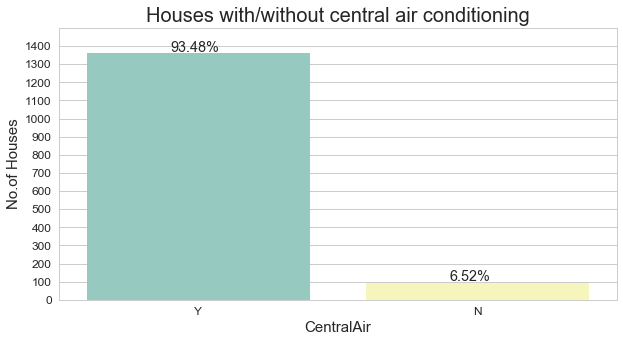

In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ps = ((train['CentralAir'].value_counts() / train['CentralAir'].shape[0]) * 100)
    vals = np.sort(ps.values)[::-1]
    order = ps.index.values[np.argsort(ps.values)[::-1]].tolist()
    ax = sns.countplot(x="CentralAir", order=order, data=train, palette='Set3')
    ax.set_title('Houses with/without central air conditioning', size=20)
    ax.set_yticks(np.arange(0, 1500, 100))
    ax.set_ylim(0, 1500)
    ax.set_xlabel(xlabel="CentralAir", size=15)
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.3, p.get_height() + 10))
    ax.set_ylabel('No.of Houses', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('CentralAir.png', format='png', dpi=480)

### Remarks:
- Almost all the houses that have been sold had central air conditioning

## HalfBath: Number of Half Baths above grade (above ground)

In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ps = ((train['HalfBath'].value_counts() / train['HalfBath'].shape[0]) * 100)
    vals = np.sort(ps.values)[::-1]
    order = ps.index.values[np.argsort(ps.values)[::-1]].tolist()
    ax = sns.countplot(x="HalfBath", order=order, data=train, palette='Set2')
    ax.set_title('Number of houses sold vs number of half baths per house', size=20)
    ax.set_yticks(np.arange(0, 1100, 100))
    ax.set_ylim(0, 1100)
    ax.set_xlabel(xlabel="HalfBath", size=15)
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.3, p.get_height() + 10))
    ax.set_ylabel('No.of Houses', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)
    fig.savefig('HalfBath.png', format='png', dpi=480)

### Remarks:
- 62.53% of all the houses sold didn't have a half bath above ground.
- 36.64% of the houses had only 1 half bath above ground.
- Only a small amount of houses had 2 half baths above ground.

# Asking questions and answering with graphs:

## How does LotArea vary with zone types?

In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    order=['RL', 'C (all)', 'FV', 'RH', 'RM']
    ax = sns.boxplot(y="LotArea", x="MSZoning", data=train, order=order)
    ax.set_ylim(0, 50000)
    ax.set_ylabel('LotArea (square feet)', size=20)
    ax.set_xlabel('MSZoning', size=20)
    ax.set_title('LotArea per zone type', size=25)
    fig.add_subplot(ax)
    fig.set_size_inches(15, 10)
    fig.savefig('LotAreavsMSZoning.png', format='png', dpi=240)

### Remarks:
- Low density residential areas seem to have the maximum spread of lot area.
- There is very little difference in the lot sizes of commercial areas.


## How does cost of properties change from zone to zone?

In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    order=['FV', 'RL', 'RH', 'RM', 'C (all)']
    ax = sns.boxplot(y="SalePrice", x="MSZoning", data=train,
                     order=order, palette='Set3')
    ax.set_xlabel('MSZoning', size=20)
    ax.set_ylabel('SalePrice (USD)', size=20)
    ax.set_title('SalePrice per zone type', size=25)
    fig.add_subplot(ax)
    fig.set_size_inches(15, 10)
    fig.savefig('SalePricevsMSZoning.png', format='png', dpi=240)

### Remarks:
- Floating villages are the most expensive properties that have been sold.
- Low density residential areas have the maximum spread when it comes to cost and reaches very high values.
- Cost of commercial aras is the lowest.


## Is there a relation between Sales price and overall quality?


In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.swarmplot(y="SalePrice", x="OverallQual",
                       data=train, palette=sns.cubehelix_palette(10, start=.5, rot=0.35))
    ax.set_xlabel('OverallQual', size=20)
    ax.set_ylabel('SalePrice (USD)', size=20)
    ax.set_ylim(0, 850000)
    ax.set_title('SalePrice per quality type', size=23)
    fig.add_subplot(ax)
    fig.set_size_inches(15, 7)
    fig.savefig('SalePricevsOverallQual.png', format='png', dpi=240)

### Remarks:
- There is a positive correlation between quality type and sales price. This is expected behaviour and confirms that the quality measurement process that has been used is fairly accurate.


## How does the Lot area affect sales price?

In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.regplot(y="SalePrice", x="LotArea", fit_reg=False,
                       data=train, color='green', marker='^')
    ax.set_xlabel('LotArea (square feet)', size=20)
    ax.set_ylabel('SalePrice (USD)', size=20)
    ax.set_ylim(0, 850000)
    ax.set_xlim(0, 20000)
    ax.set_title('SalePrice vs LotArea', size=23)
    fig.add_subplot(ax)
    fig.set_size_inches(15, 7)
    fig.savefig('SalePricevsLotArea.png', format='png', dpi=240)

### Remarks:
- While there is a positive dependency between LotArea and SalesPrice, one would expect that the correlation would be much higher. 
- This means that other factors apart from lot area play major roles in determining the price of a property.


## How does age of a house affect its price?

In [ ]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    ax = sns.lmplot(y="SalePrice", x="YearBuilt",
                       data=train, fit_reg=False, hue='OverallQual', size=10, aspect=1.3)
    ax.axes[0, 0].set_xlabel('YearBuilt', size=20)
    ax.axes[0, 0].set_ylabel('SalePrice (USD)', size=20)
    ax.axes[0, 0].set_ylim(0, 700000)
    ax.axes[0, 0].set_xticks(np.arange(1870, 2020, 10))
    ax.axes[0, 0].set_title('SalePrice vs YearBuilt', size=23)

### Remarks:
- On an average, newer houses cost more than old ones 
- It’s also apparent that except for a few very old houses, the newer ones are rated to have higher quality.
